**Assignment 2- CNN**

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers import Dense
from keras import optimizers
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K


In [ ]:
# Create train and test dataset
(X_train, y_train), (X_test, y_test) = 

11501568/11490434 [==============================] - 0s 0us/step


1.a. start with creating a visualization of your input data

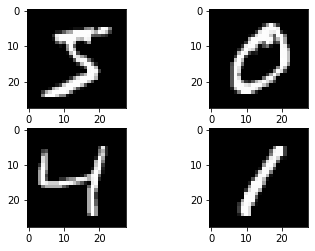

In [ ]:
#1.a. Create the visualization here
# Let's look into the dataset by visualizing some data opints


In [ ]:
#preprocessing
# Kears allows us to add the number of channels either to the beggining of shape or the end of it
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [ ]:
# You need to apply some preprocessing on X and y

# normalize inputs from 0-255 to 0-1


# Encode outputs


1.b. Create a CNN model with 4 convolution layers in which two of them have 32 and two of them have 64 filters. The fully connected layer has one hidden layer (512 nodes). Draw the Learning curve. What is your understanding from learning curve? Batch size=128 and epochs=20

In [ ]:
#1.b. 
# Create model here


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
hist = #Start training the model

In [ ]:
# Measure test accuracy
scores = #Measure test accuracy
print("Accuracy: %.2f%%" % (scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0337 - accuracy: 0.9921
Accuracy: 99.21%


In [ ]:
# Draw Learning curve
def learning_curve(hist):
  #Create a function to draw learning curves
  # This will help you to just call this function in future for drawing the learning curves

learning_curve(hist)

In [ ]:
## What is your understanding from the learning curve?
# They look fine. There is a little bit of overfitting but nothing to be worried about

**Part 2- CIFAR10**

In [ ]:
(X_train, y_train), (X_test, y_test) = # Load CIFAR 10 data here
labels= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


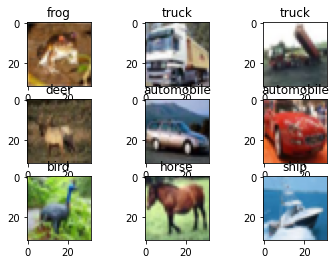

In [ ]:
# 2.a. Let's look into the dataset by visualizing some data opints


2.b. Apply the pre-processing algorithms that we discussed last week. The augmented images are supposed to be seared by 20%, zoomed by 20% and horizontally flipped. Now, design a CNN model with 4 convolution layers in which two of them have 32 and two of them have 64 filters. The fully connected layer has two hidden layers (512 and 256 nodes respectively). Draw the Learning curve. What is your understanding from learning curve?

In [ ]:
# 2.b
# Encoding output


# create data generator
datagen = 
# prepare iterator
it_train = 

# Create model here


model.compile( ) #Compile model
hist = # start training

In [ ]:
# Draw learning curve here
learning_curve(hist)

In [ ]:
# What is the issue and possible solution for this learning curve?

In [ ]:
#2.c. Solution to resolve overfitting
# One solution is adding drop out
# Implement your solution here and train model

In [ ]:
# Draw learning curve
learning_curve(hist)

In [ ]:
# 2.d- This part is up to you to choose proper pre-trained model
# I chose VGG16 and RESNet50
# Implementing VGG16
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np

vgg_model = 
vgg_model.compile()   #Compile VGG16 model
hist = 


In [ ]:
learning_curve(hist)

In [ ]:
vgg_model.evaluate(X_test, y_test, batch_size=256, verbose=1)

In [ ]:
# This ios my second pre-trained model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import GlobalAveragePooling2D

base_model = ResNet50()


# Let's train the model using RMSprop
model.compile
hist= 

In [ ]:
learning_curve(hist)